In [6]:
import numpy as np
from matplotlib import pyplot as plt
import ext_compl_rd as ecr
import importlib

# Extended Complex Road

### Without Control

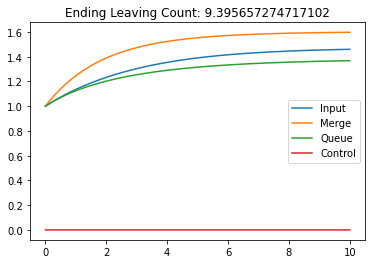

In [14]:
importlib.reload(ecr)

# Setup initial conditions
alpha = 1
gamma = 1
delta = 1
beta = 1
rho = 1
cap = 5.0

# Create Segments
begin_segment = ecr.BeginSegment(
    3., 
    ecr.ts(lambda c: (alpha - (alpha*c)/cap, -alpha/cap)),
    ecr.ts(lambda c, n: (gamma*c*(1-n/cap)*(1-c/cap), gamma - 2*gamma*c/cap - gamma*n/cap + 2*gamma*c*n/(cap**2), -gamma*c/cap + gamma*c**2/(cap**2)))                                 
)

merge_segment = ecr.MergeSegment(
    2.,
    3.,
    2.,
    ecr.ts(lambda c, n: (delta*c*(1-c/cap), delta - 2*delta*c/cap, 0)),
    ecr.ts(lambda c, q: (beta*(1-c/cap), -beta*c/cap, 0)),
    ecr.ts(lambda c, q: (rho*q*(1-c/cap)*(1-q/cap), -rho*q/cap + rho*q**2/(cap**2), rho - 2*rho*q/cap - rho*c/cap + 2*rho*q*c/(cap**2))),
    0.0
)

end_segment = ecr.EndSegment(
    2.0
)

# Setup the road
net = ecr.ExtComplRoad()
net.add(begin_segment)
net.add(merge_segment)
net.add(end_segment)

# Setup initial conditions
ni, mi, li = 1., 1., 1.
init_roads = np.array([ni, mi, li])

q1 = 1.
init_queues = np.array([q1])

t0, tf = 0,10
time_span = (t0, tf)
num_intervals = 1000

update_func = None

# Calculate the solution
roads, queues, control = net.multi_step(init_roads, init_queues, time_span, update_func, num_intervals)

# Plot the results
domain = np.linspace(t0, tf, 1001000)
fig = plt.figure()

plt.title(f"Ending Leaving Count: {-roads[-1][-1]}")
for i in range(2):
    plt.plot(domain, roads[i], label=["Input", "Merge"][i])
plt.plot(domain, queues[0], label="Queue")
plt.plot(domain, control[0], label="Control")
plt.legend()
plt.show()

### With Control